In [267]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


# 1.Загрузите датасет breast_cancer.

In [268]:
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target
X.shape


(569, 30)

# 2. Выберите два первых признака. 
Таким образом мы уменьшим размерность задачи. У нас была задача множественной классификации, а стала - бинарная.

In [269]:
X_2d = X[:, :2]
X_2d.shape, X_2d[:10]


((569, 2),
 array([[17.99, 10.38],
        [20.57, 17.77],
        [19.69, 21.25],
        [11.42, 20.38],
        [20.29, 14.34],
        [12.45, 15.7 ],
        [18.25, 19.98],
        [13.71, 20.83],
        [13.  , 21.82],
        [12.46, 24.04]]))

# 3.Разделите датасет на обучающую и тестовую выборки в пропорции 80-20.

In [270]:
X_train, X_test, y_train, y_test = train_test_split(X_2d, y, train_size=0.8)
X=X_2d

## 4.Постройте классификатор на опорных векторах с гауссовым ядром с параметром регуляризации C=0.01. 
Выведите на экран значение точности на тестовой и обучающей выборке. Сделайте предварительный вывод о степени обученности модели.


In [271]:
clf = SVC(C=0.01)

clf.fit(X_train, y_train)

print("Train accuracy :", round(clf.score(X_train, y_train), 3))
print("Test accuracy :", round(clf.score(X_test, y_test), 3))
# Тестовая точность близка к обучающейся => модель недообучается

Train accuracy : 0.741
Test accuracy : 0.789


# 5.Постройте графически зависимость тестовой и обучающей точности от размера обучающей выборки.
Прокомментируйте получившийся результат. Сделайте вывод о том, недообучается или переобучается модель? В зависимости от этого выберите варианты, которые могут привести к увеличению точности модели (обычно подходит больше одного варианта):
- собрать больше объектов наблюдения;
- провести обучение на меньшем объеме данных;
- исключить часть признаков из модели;
- добавить новые признаки в модель;
- добавить полиномиальные признаки;
- попробовать более сложные модели;
- попробовать более простые модели;
- увеличить регуляризацию модели;
- уменьшить регуляризацию модели;


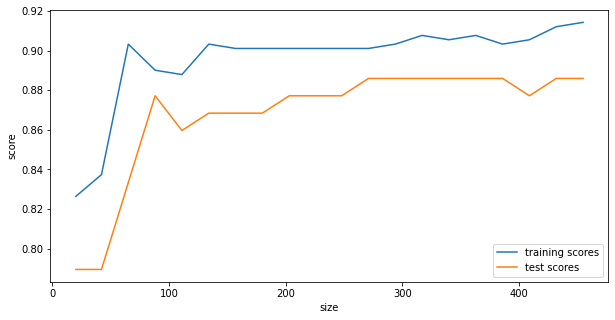

In [272]:
training_scores = []
test_scores = []
numbers = []
 
for i in np.linspace(20, len(X_train), 20):
    i = int(i)
    clf = SVC(C=10, kernel='rbf')
    X = X_train[:i]
    y = y_train[:i]
    clf.fit(X, y)
    
    numbers.append(i)
    training_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))
    
plt.figure(figsize=(10, 5))
plt.plot(numbers, training_scores, label="training scores")
plt.plot(numbers, test_scores, label="test scores")
plt.ylabel("score")
plt.xlabel("size")
plt.legend(loc="best");


Для увеличения точности модели подойдут:
- собрать больше объектов наблюдений
- добавить новые признаки в модель
- попробовать более сложные модели
- увеличить регуляризацию

### 6.Проверьте выдвинутую гипотезу и попробуйте улучшить модель в соответствии с выбранными рекомендациями. Проверьте, увеличивается ли тестовая точность. Сделайте вывод.

In [273]:
clf = SVC(C=0.5) # увеличение регуляризации
clf.fit(X_train, y_train)
print(f'test accuracy: {clf.score(X_test, y_test)}')
print(f'train accuracy: {clf.score(X_train, y_train)}')
# тестовая точность увеличилась

test accuracy: 0.8947368421052632
train accuracy: 0.9142857142857143


In [274]:
from sklearn.neural_network import MLPClassifier

# попробовать более сложную модель
clf = MLPClassifier(alpha=3, hidden_layer_sizes=(15,2), max_iter=1000, random_state=1, solver='lbfgs')
clf.fit(X_train, y_train)
print(f'test accuracy: {clf.score(X_test, y_test)}')
print(f'train accuracy: {clf.score(X_train, y_train)}')

test accuracy: 0.8771929824561403
train accuracy: 0.9098901098901099


## 7.Повторите предыдущий пункт для различных значений C в диапазоне от 0,0001 до 1 000 000. 
Обратите внимание на шкалу по вертикальной оси. Для каких значений тестовая точность оптимальна? Какие значения дают недообучение? Какие - переобучение?
## 8.Постройте график зависимости тестовой и обучающей точности от значения регуляризационного параметра. 
Сделайте вывод о зависимости степени регуляризации на точность модели.


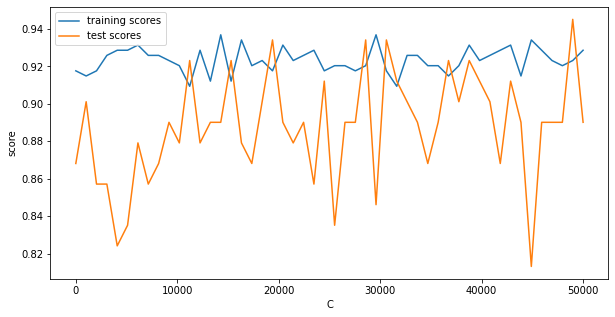

In [275]:
training_scores = []
test_scores = []
numbers = np.linspace(1, 50_000, 50) # слишком долго для 1_000_000, поэтому 50_000

for i in numbers:
    clf = SVC(C=i, kernel='rbf')
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

    clf.fit(X_train, y_train)
    
    training_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

plt.figure(figsize=(10, 5))
plt.plot(numbers, training_scores, label="training scores")
plt.plot(numbers, test_scores, label="test scores")
plt.ylabel("score")
plt.xlabel("C")
plt.legend(loc="best");


# 9.Найдите методом подбора оптимальное значение параметра регуляризации (примерное).

In [278]:
clf = SVC(C=2) # оптимальное значение регуляризации 2
clf.fit(X_train, y_train)
print(f'test accuracy: {clf.score(X_test, y_test)}')
print(f'train accuracy: {clf.score(X_train, y_train)}')

test accuracy: 0.9120879120879121
train accuracy: 0.9230769230769231


# 10.Повторите два предыдущих пункта для метода опорных векторов с линейным ядром.
Сравните получившиеся результаты. Сделайте вывод о сравнительной эффективности двух этих моделей.


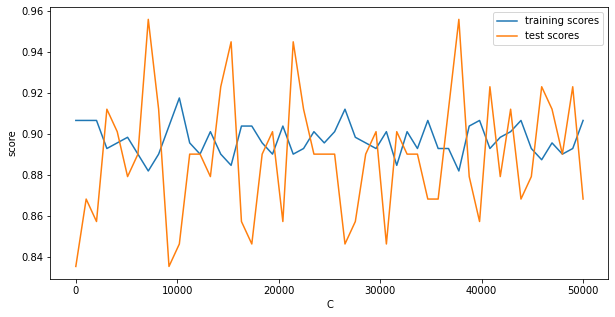

In [279]:
training_scores = []
test_scores = []
numbers = np.linspace(1, 50_000, 50) # слишком долго для 1_000_000, поэтому 50_000

for i in numbers:
    clf = SVC(C=i, kernel='linear')
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

    clf.fit(X_train, y_train)
    
    training_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

plt.figure(figsize=(10, 5))
plt.plot(numbers, training_scores, label="training scores")
plt.plot(numbers, test_scores, label="test scores")
plt.ylabel("score")
plt.xlabel("C")
plt.legend(loc="best");


## Вывод
Значения полученные с линейным ядром, оказались немного хуже, чем значения полученные при радиально-базисной функции